# 1. Images - read, write and display; ROIs

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

from copy import copy


def display_image(image):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

**a)** Read the name of a file containing an image in `jpg` format and show it
in a window, whose name is the name of the file. Test whether the image was
successfully read. Display the height and width of the image, on the console.

File name: watershed_coins.jpg
Height: 312
Width: 252


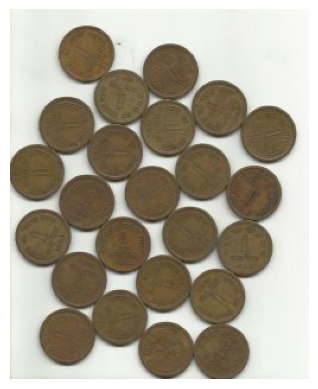

In [2]:
IMAGE_PATH = "../../images/watershed_coins.jpg"

file_name = IMAGE_PATH.rsplit("/", maxsplit=1)[-1]
image = cv2.imread(IMAGE_PATH)

print("File name:", file_name)
print("Height:", image.shape[0])
print("Width:", image.shape[1])

display_image(image)

**b)** Read a color image from a file in 'jpg' format and save it in 'bmp' format.

In [3]:
cv2.imwrite("out/" + file_name.replace(".jpg", ".bmp"), image)

True

**c)** Read a color image from a file, show the mouse cursor over the image, and the coordinates and RGB components of
the pixel under the cursor. When the user clicks on the mouse, let him modify the RGB components of the selected
pixel.

Editing pixel on 54 30
New red? 255
New green? 0
New blue? 0


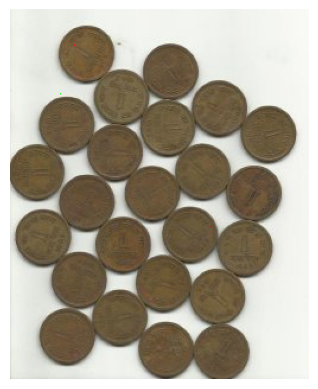

In [5]:
def mouse_callback_RGB(event, x, y, flags, params):
    font = cv2.FONT_HERSHEY_SIMPLEX
    info = f"{x, y}: B:{image[y, x, 0]}, G:{image[y, x, 1]}, R:{image[y, x, 2]} "

    if event == cv2.EVENT_LBUTTONDOWN:
        print("Editing pixel on", x, y)
        red = int(input("New red? "))
        green = int(input("New green? "))
        blue = int(input("New blue? "))
        image[y, x] = (blue, green, red)

    image_copy = copy(image)
    print("", sep="", end="")
    cv2.putText(image_copy, info, (x, y), font, 0.5, (0, 0, 0), 1)
    cv2.imshow(file_name, image_copy)


cv2.namedWindow(file_name)
cv2.setMouseCallback(file_name, mouse_callback_RGB)
cv2.imshow(file_name, image)
key = cv2.waitKey(0)
cv2.destroyAllWindows()

display_image(image)

**d)** Read an image from a file, allow the user to select a region of interest (ROI) in
the image, by clicking on two points that identify two opposite corners of the
selected ROI, and save the ROI into another file.

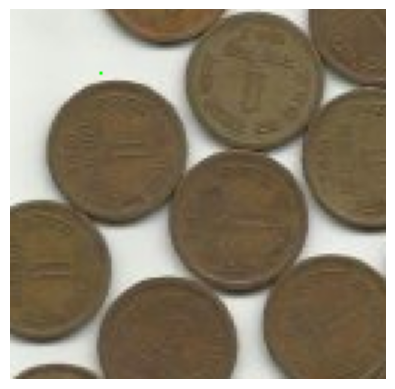

In [6]:
roi = cv2.selectROI(file_name, image)
selected = image[roi[1] : roi[1] + roi[3], roi[0] : roi[0] + roi[2]]

display_image(selected)

cv2.destroyAllWindows()